In [18]:
include("../../core/kinetic.jl")
using .Kinetic
using GLMakie

LoadError: ArgumentError: Package PythonPlot not found in current path.
- Run `import Pkg; Pkg.add("PythonPlot")` to install the PythonPlot package.

In [5]:
data = Datapoint(N=500, r0=.002, div=10, ic="chain2", integrator="sym")

#evolve!(data, tprime=10, div=1000)

Datapoint("init", 500, 0.002, "sym", "chain2", 0.1, 10, 0, 0, 0.0, 0, [0.0 0.0; 0.001002004008016032 1.0040120320801923e-6; … ; 0.49899799599198397 0.24899900000401604; 0.5 0.25], [0.92848 0.37139; 0.92848 0.37139; … ; 0.92848 0.37139; 0.92848 0.37139])

In [6]:
ms(r) = r > 0 ? 2*r/0.001 : 2
histbins(N) = range(0,4,step=.1)

basesty(dat) = (
    ##
    c = :black,
    framestyle = :box,
    legend = false,
    marker = :circle,
    aspect_ratio = 1,
    xlim = (0,1),
    ylim = (0,1),
    xticks = 0:1,
    yticks = 0:1,
    grid = false,
    tickfontsize = 14,
    labelfontsize = 16,
    normalize = :pdf,
    ##
    markersize = ms(dat.r0),
    bins = histbins(dat.N),
    ##
    dpi = 200,
)

newfig() = newfig(Datapoint())

function newfig(dat::Datapoint)
    ##
    default(;basesty(dat)...)
    fig =  plot(
        size = (700,800), 
        layout = 4,
    )
    ## 
    # custum styles
    for i in [1,]
        plot!(fig, subplot=i,
            xlabel = L"x",
            ylabel = L"y",
        )
    end
    for i in [2,]
        plot!(fig, subplot=i,
            xlabel = L"v_x",
            ylabel = L"v_y",
            xlim = (-2,2),
            ylim = (-2,2),
            xticks = -2:2,
            yticks = -2:2
        )
    end
    for i in [3,]
        plot!(fig, subplot=i,
            xlabel = L"v",
            ylabel = L"p(v)",
            xlim = (0,3),
            ylim = (0,2),
            xticks = 0:3,
            yticks = 0:2,
            aspect_ratio = 3//2
        )
    end
    for i in [4,]
        plot!(fig, subplot=i,
            xlabel = "",
            ylabel = "",
            xticks = [],
            yticks = [],
        )
    end
    ##
    return fig
end

function boxplot(fig::Plots.Plot, dat::Datapoint)
    ##
    v = sqrt.(dat.vxy[:,1].^2 + dat.vxy[:,2].^2)
    ##
    scatter!(fig, subplots=1,  dat.xy[:,1],  dat.xy[:,2])
    scatter!(fig, subplots=2, dat.vxy[:,1], dat.vxy[:,2])
    scatterhist!(fig, subplots=3, v)
end

boxplot(dat::Datapoint) = boxplot(newfig(), dat)


boxplot (generic function with 2 methods)

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950  5.206892 seconds (3.43 M allocations: 112.438 MiB, 0.34% gc time)
  4.234970 seconds (648 allocations: 43.922 KiB)


[ Info: Saved animation to /home/jcs/Joe/code/kinetic/scripts/000/out.gif


Plots.AnimatedGif("/home/jcs/Joe/code/kinetic/scripts/000/out.gif")
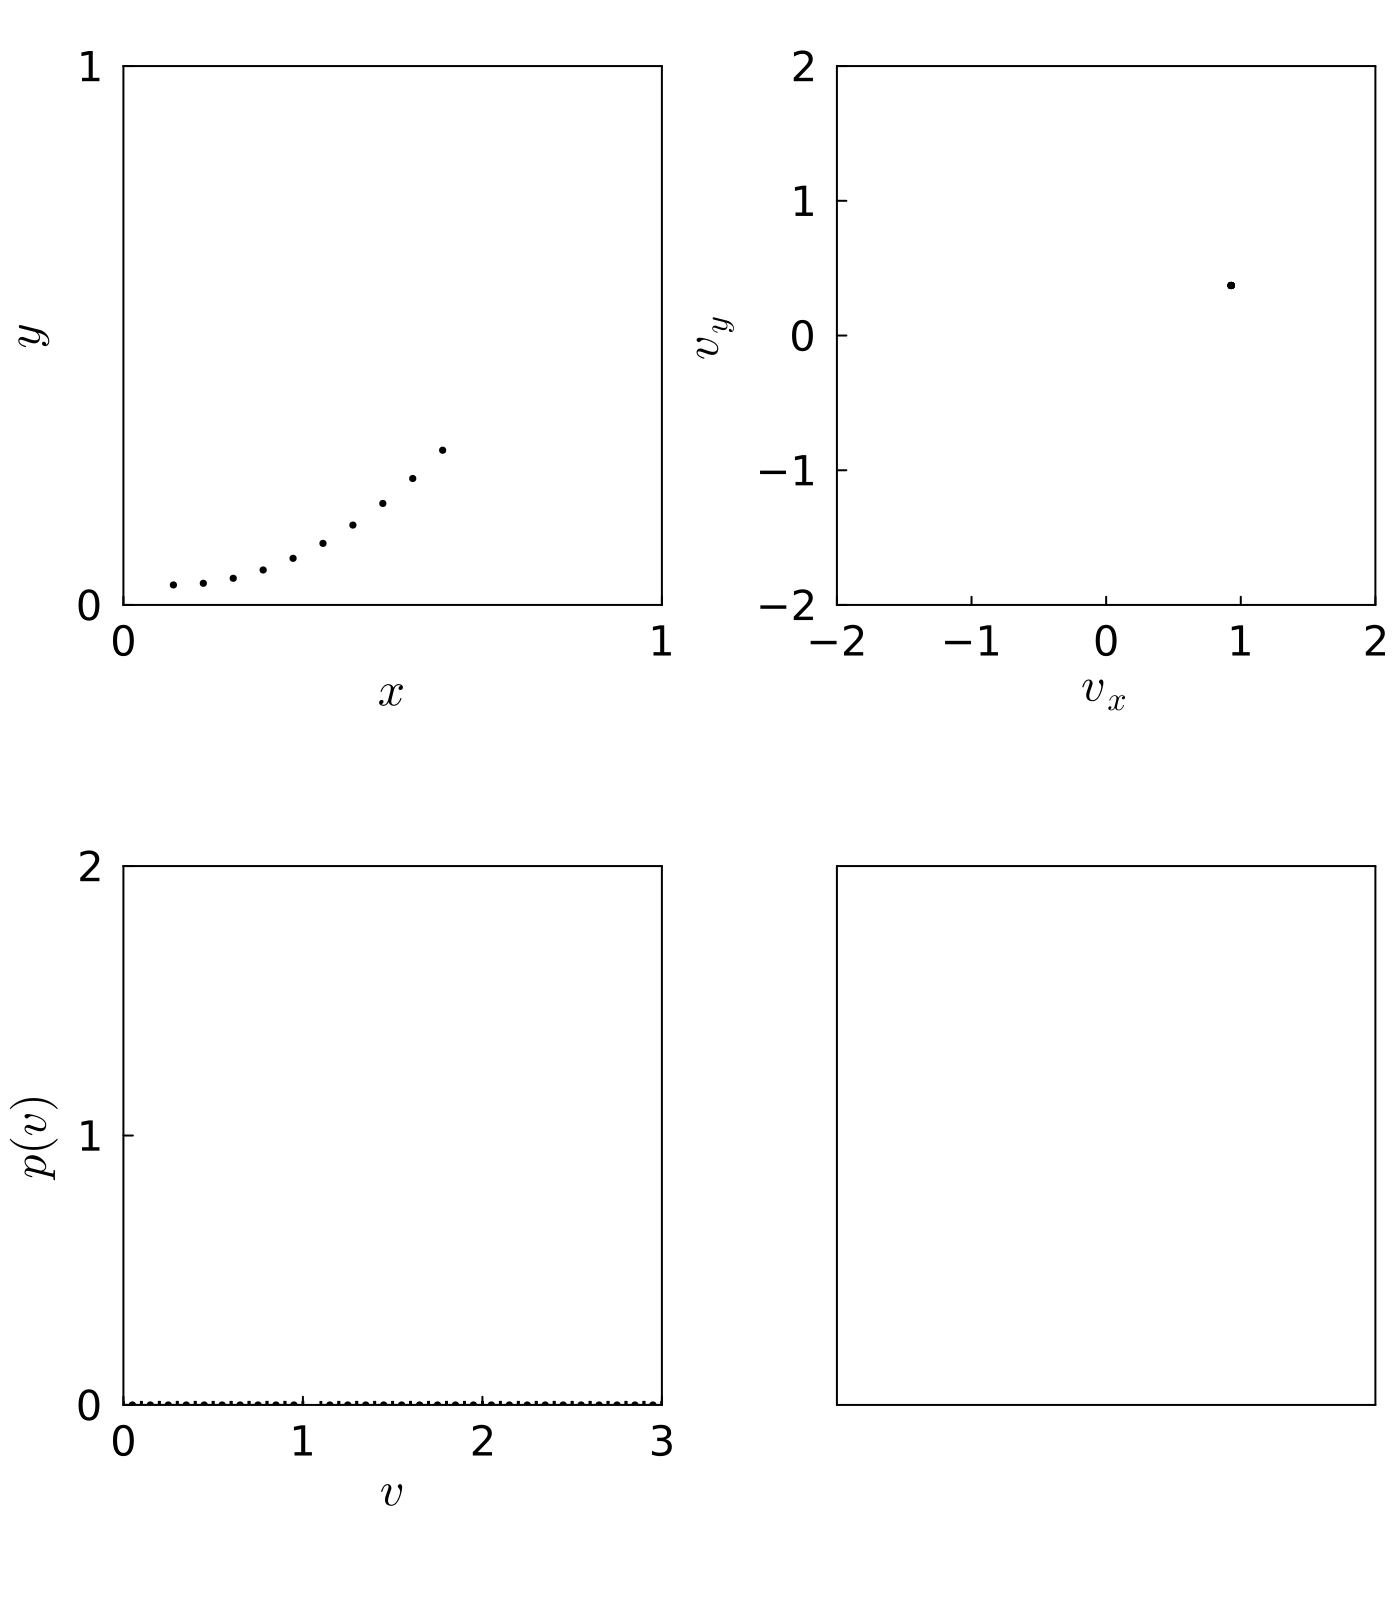

In [19]:
data = Datapoint(N=10, r0=.002, div=10, ic="chain2", integrator="free")

@time anim = @animate for i=1:50
    evolve!(data; dt=.1, div=100)
    boxplot(data)
    print(i)
end

@time gif(anim, "out.gif", fps=15)


In [20]:
@time for i=1:50
    evolve!(data; dt=.1, div=100)
    #boxplot(data)
end

  0.024485 seconds (125.25 k allocations: 4.431 MiB)
